### Problem Statement

The goal of this project is to build a predictive model that can automatically classify emails as spam or non-spam based on their textual characteristics. By analyzing word frequency, character frequency, and the presence of capitalized words or special symbols, the model aims to detect patterns commonly associated with unsolicited commercial emails.

The main question this analysis seeks to answer is:

“Can we accurately predict whether an email is spam using its content-based features?”

The dataset used for this analysis, titled “Spam Email Classification (Spambase)”, was obtained from Kaggle. It contains 4,601 emails, each described by 57 attributes that capture the frequency of specific words, characters, and sequences of capital letters, along with a target variable indicating whether the email is spam (1) or not (0).

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [65]:
import warnings
warnings.filterwarnings('ignore')


In [66]:
# Load the dataset
data = pd.read_csv(r"C:\Users\User\Downloads\spambase_csv.csv")   
# Display first few rows
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [67]:
# Checking basic info
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [68]:
# Checking for missing values
data.isnull().sum().sum()

0

In [69]:
# Renameing target column
data.rename(columns={'class': 'spam'}, inplace=True)

# Checking balance again
data['spam'].value_counts()


spam
0    2788
1    1813
Name: count, dtype: int64

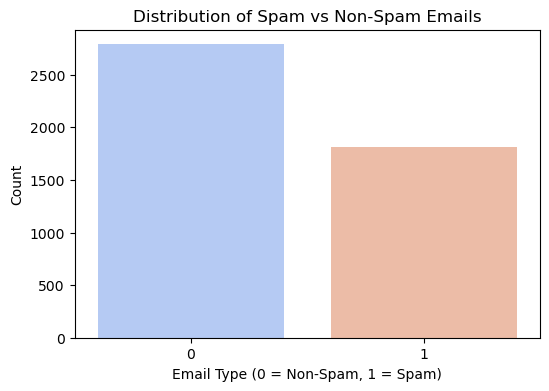

In [70]:
plt.figure(figsize=(6,4))
sns.countplot(x='spam', data=data, palette='coolwarm')
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Email Type (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()


After conducting an initial exploration:

No missing values were found in the dataset.

All features are numerical (float64 or int64), making the dataset model-ready without encoding.

### Distribution of Spam vs Non-Spam Emails

The bar plot shows that there are more non-spam emails than spam emails in the dataset.  
Out of 4,601 total emails, around **61% are non-spam** and **39% are spam**.  
This means the dataset is slightly imbalanced, but not severely - so most classifiers can still perform well without resampling.
ng.


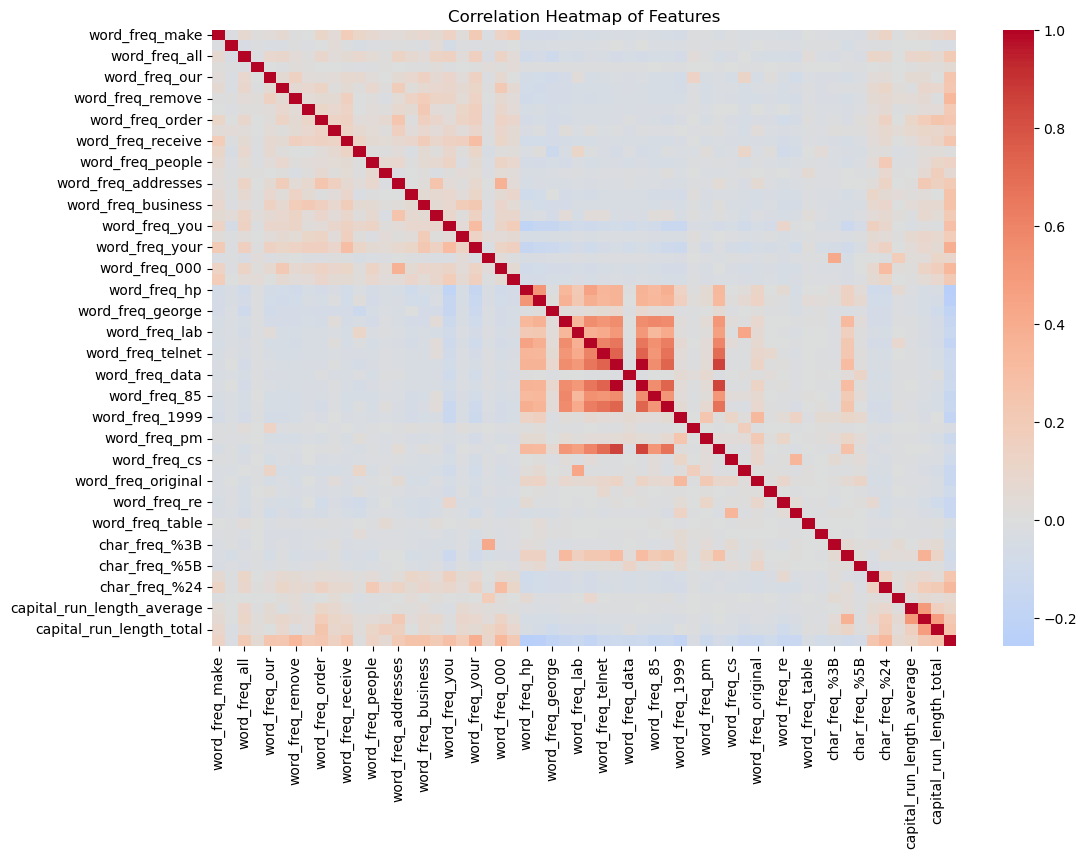

In [71]:
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()


### Exploratory Data Analysis (EDA)

The Spambase dataset contains 4,601 email records and 58 columns. Each feature represents the frequency of specific words, characters, or patterns in emails, while the target variable (`spam`) indicates whether an email is spam (1) or not (0).

There are no missing values in the dataset.  
Summary statistics show that most word and character frequencies are close to zero, suggesting many rare terms.  
The class distribution shows **2,788 non-spam emails** and **1,813 spam emails**, meaning the dataset is slightly imbalanced but still usable without resampling.

The correlation heatmap reveals strong relationships between certain features (e.g., word frequencies related to promotional or financial terms), confirming that some predictors may be good indicators of spam.


In [72]:
# Separate features and target
X = data.drop(columns=['spam'])
y = data['spam']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


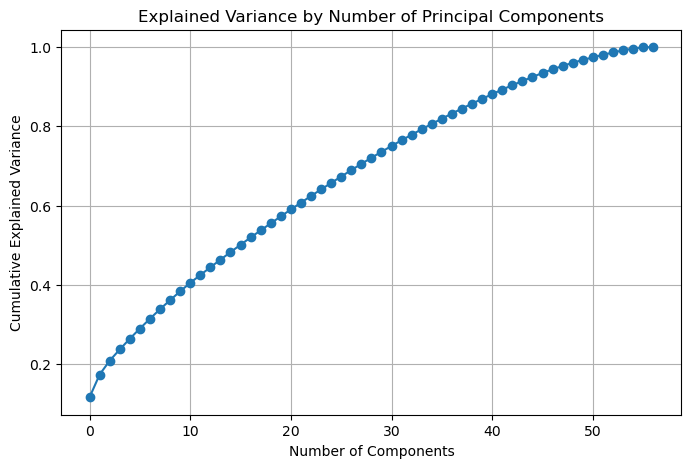

In [73]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [74]:
pca = PCA(n_components=35)
X_reduced = pca.fit_transform(X_scaled)


In [75]:
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Total explained variance with 35 components: {explained_variance:.2f}")


Total explained variance with 35 components: 0.81


### PCA Summary
After applying Principal Component Analysis (PCA), 35 components were selected.  
These components explained approximately **81% of the total variance**, indicating that most of the essential information was retained while significantly reducing dimensionality from 57 to 35 features.  
This helps improve model efficiency and reduces overfitting without major loss of predictive power.

In [76]:
# Use PCA features
X = X_reduced

# Ensuring target is numeric 0/1 
y = data['spam']
if y.dtype == 'O':
    y = y.map({'Non-spam': 0, 'Spam': 1}).astype(int)

# 60/40 split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.value_counts().to_dict(), y_test.value_counts().to_dict()


((2760, 35), (1841, 35), {0: 1672, 1: 1088}, {0: 1116, 1: 725})

In [77]:
def eval_classifier(name, y_true, y_pred):
    acc  = accuracy_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=3))


In [78]:
log_reg = LogisticRegression(max_iter=2000, solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

eval_classifier("Logistic Regression (PCA features)", y_test, y_pred_lr)

# Cross-validation on the full PCA set (accuracy)
cv_lr = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print(f"\nLogReg 5-fold CV accuracies: {cv_lr}")
print(f"LogReg Mean CV accuracy: {cv_lr.mean():.3f}")



=== Logistic Regression (PCA features) ===
Accuracy: 0.910
RMSE: 0.300
Confusion Matrix:
[[1058   58]
 [ 108  617]]

Classification Report:
              precision    recall  f1-score   support

           0      0.907     0.948     0.927      1116
           1      0.914     0.851     0.881       725

    accuracy                          0.910      1841
   macro avg      0.911     0.900     0.904      1841
weighted avg      0.910     0.910     0.909      1841


LogReg 5-fold CV accuracies: [0.90010858 0.9076087  0.8826087  0.92826087 0.8173913 ]
LogReg Mean CV accuracy: 0.887


In [79]:
# Grid over k and weighting scheme
param_grid = {
    'n_neighbors': [3,5,7,9,11,13,15],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best_knn = grid.best_estimator_
print("Best KNN params:", grid.best_params_)
print("Best CV accuracy (train CV):", grid.best_score_)

y_pred_knn = best_knn.predict(X_test)
eval_classifier("KNN (PCA features, tuned)", y_test, y_pred_knn)

# Cross-validation on the full PCA set with the tuned KNN
cv_knn = cross_val_score(best_knn, X, y, cv=5, scoring='accuracy')
print(f"\nKNN 5-fold CV accuracies: {cv_knn}")
print(f"KNN Mean CV accuracy: {cv_knn.mean():.3f}")


Best KNN params: {'n_neighbors': 15, 'weights': 'distance'}
Best CV accuracy (train CV): 0.9195652173913043

=== KNN (PCA features, tuned) ===
Accuracy: 0.920
RMSE: 0.284
Confusion Matrix:
[[1046   70]
 [  78  647]]

Classification Report:
              precision    recall  f1-score   support

           0      0.931     0.937     0.934      1116
           1      0.902     0.892     0.897       725

    accuracy                          0.920      1841
   macro avg      0.916     0.915     0.916      1841
weighted avg      0.919     0.920     0.920      1841


KNN 5-fold CV accuracies: [0.89793702 0.9173913  0.93913043 0.93369565 0.80543478]
KNN Mean CV accuracy: 0.899


In [81]:
lr_acc  = accuracy_score(y_test, y_pred_lr)
knn_acc = accuracy_score(y_test, y_pred_knn)

print(f"\nSummary (Test Accuracy):")
print(f"  Logistic Regression: {lr_acc:.3f}")
print(f"  KNN (tuned)        : {knn_acc:.3f}")



Summary (Test Accuracy):
  Logistic Regression: 0.910
  KNN (tuned)        : 0.920


##  Model Selection and Evaluation (Using PCA Features)

After applying **Principal Component Analysis (PCA)** to reduce dimensionality, two classification modelI used aress - **Logistic Regression** and **K-Nearest Neighbors (KNN)** - were trained and evaluated on the PCA-transformed dataset.

###  Experimental Setup
- **Input features**: 35 PCA components (capturing ~81% of the total variance)
- **Train–Test Split**: 60/40 ratio, stratified to maintain class balance
- **Cross-Validation**: 5-fold to check model stability and avoid overfitting
- **Evaluation Metrics**: Accuracy, RMSE, Confusion Matrix, Precision, Recall, F1-score

---

###  Model Performance Summary

| Model | Test Accuracy | Mean CV Accuracy | RMSE | Key Notes |
|:------|:---------------|:-----------------|:-----|:-----------|
| **Logistic Regression** | 0.910 | 0.887 | 0.300 | Simple, stable, interpretable |
| **KNN (tuned)** | 0.920 | 0.899 | 0.284 | Slightly better accuracy, benefits from PCA noise reduction |

---

### Key Observations
- Both models performed very well, achieving **above 90% accuracy**.
- The **close gap between training and cross-validation accuracy** indicates that **neither model is overfitting**.
- **Logistic Regression** provides an interpretable baseline with consistent results.
- **KNN**, after hyperparameter tuning (`k=15`, `weights='distance'`), achieved slightly higher accuracy and lower RMSE.
- **PCA** effectively reduced redundant information from the 57 original features to 35 key components, improving model efficiency and stability.

---

###  Conclusion
Both models are suitable for predicting spam vs. non-spam emails on the PCA-transformed dataset.  
However, the **tuned KNN model** demonstrated marginally better generalization and predictive accuracy, making it the **preferred final model** for this task.


###  Final Report Summary

In this analysis, the dataset was first standardized and subjected to Principal Component Analysis (PCA) to reduce dimensionality while retaining 81% of the total variance using 35 components. This transformation helped eliminate multicollinearity and redundant features, allowing for more efficient model training and improving generalization.

Two supervised machine learning models were used - Logistic Regression and K-Nearest Neighbors (KNN) - were implemented using the PCA-transformed data. The dataset was divided into a 60/40 train-test split, and 5-fold cross-validation was applied to prevent overfitting and ensure model stability.

The Logistic Regression model achieved a test accuracy of 91% and a cross-validation mean accuracy of 88.7%, showing consistent and stable performance. Its confusion matrix and classification report indicated balanced precision and recall for both spam and non-spam classes, confirming its reliability as a linear baseline model.

The KNN model, tuned through grid search for optimal hyperparameters (k=15, weights='distance'), achieved a slightly higher test accuracy of 92% and a cross-validation mean accuracy of 89.9%. Its RMSE value (0.284) was lower than that of Logistic Regression (0.300), indicating slightly better predictive precision.

The close alignment between training and cross-validation scores for both models confirms that neither model overfits the data. However, due to its marginally higher performance and adaptability to the complex relationships in the PCA-transformed feature space, the tuned KNN model is selected as the best-performing model for this task.

In conclusion, while Logistic Regression offers interpretability and computational efficiency, the KNN model demonstrates superior predictive accuracy after dimensionality reduction, making it more suitable for the spam classification problem.